We first install kaggle

In [1]:
pip install kaggle

We then import kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download danielgrijalvas/movies

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies
License(s): CC0-1.0
  0% 0.00/424k [00:00<?, ?B/s]
100% 424k/424k [00:00<00:00, 82.7MB/s]


unzipping the folder


In [6]:
!unzip /content/movies.zip

Archive:  /content/movies.zip
  inflating: movies.csv              


Importing the relevant libraries that will be used in the project

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
movies_data=pd.read_csv('/content/movies.csv')

Data Overview & Cleaning

Initial exploration to check for the first 10 rows.

In [9]:
movies_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Gives information about the rows and columns in the dataset as well as their data types.

In [10]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Analyzes numeric as well as to object series or series of a DataFrame and check for outliers.

In [11]:
movies_data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Used to check for missing values in the dataset

In [12]:
movies_data.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


We have several missing values in our dataset in the different variables

We are gonna handle this missing values by replacing the missing values with the median of the columns because comparing the mean and the median of most of the columns they indicate a skewness to the right meaning if we use the mean it might influence the outcome of the analysis and might not be as accurate as using the median.

In [13]:
# Imputing the missing values in 'score', 'votes', 'budget', 'gross', and 'runtime' with median
columns_to_impute = ['score', 'votes', 'budget', 'gross', 'runtime']

for col in columns_to_impute:
    median_value = movies_data[col].median()
    movies_data[col] = movies_data[col].fillna(median_value)

In [14]:
#getting the mode
rating_mode = movies_data['rating'].mode().iloc[0]
#filling for the rating column
movies_data['rating'] = movies_data['rating'].fillna(rating_mode)
#getting the mode
released_mode = movies_data['released'].mode().iloc[0]
#filling for the released column
movies_data['released'] = movies_data['released'].fillna(released_mode)
#getting the mode
writer_mode = movies_data['writer'].mode().iloc[0]
#filling for the released column
movies_data['writer'] = movies_data['writer'].fillna(writer_mode)
#getting the mode
star_mode = movies_data['star'].mode().iloc[0]
#filling for the released column
movies_data['star'] = movies_data['star'].fillna(star_mode)
#getting the mode
country_mode = movies_data['country'].mode().iloc[0]
#filling for the released column
movies_data['country'] = movies_data['country'].fillna(country_mode)
#getting the mode
company_mode = movies_data['company'].mode().iloc[0]
#filling for the released column
movies_data['company'] = movies_data['company'].fillna(company_mode)

Fillna was used to handle and fill in all missing values in the columns of the dataset

To check if we still have missing values

In [15]:
movies_data.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


I have filled all missing values in our dataset for the numerical values I filled with the median and for the categorical columns I filled using the mode.

In [16]:
movies_data.duplicated().sum()

0

there are no duplicates in our dataset

Data Exploration and Analysis

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Name: count, dtype: int64


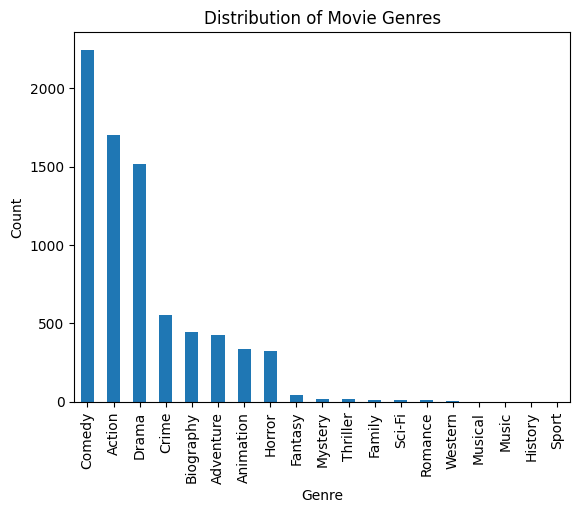

In [19]:
#Genre Analysis -here we are analyzing the distribution of movie genres and identifying popular genres over time.
genre_counts = movies_data['genre'].str.split('|').explode().value_counts()

# Outputs the top 10 genres
print(genre_counts.head(10))

# Bar graph to shop n genre distribution
genre_counts.plot(kind='bar', title='Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Observations from the bar graph
- Comedy is the most popular genre, with over 2000 movies.
- Action and Drama Follow being the next most popular genres, with around 1500 and 1500 movies.
- Niche Genres: Genres like Fantasy, Mystery, Thriller, Family, Romance, Western, Music, History, and Sport have relatively low counts, suggesting they are niche genres compared to Comedy, Action, and Drama.

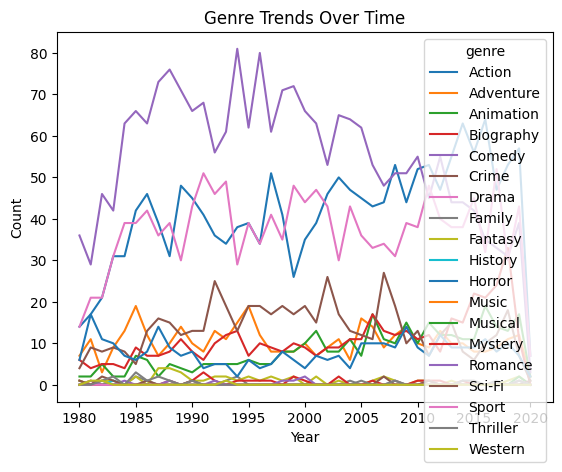

In [23]:
movies_data_expanded = movies_data.explode('genre')

#pivot table to count genres by year
genre_trends = movies_data_expanded.pivot_table(
    index='year', columns='genre', aggfunc='size', fill_value=0
)

# Visualize genre trends over time
genre_trends.plot(kind='line', title='Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Observations from the data
- Comedy, Action, and Drama have remained consistently popular throughout the decades.
- Adventure, Animation, and Biography have seen a significant increase in popularity, especially in recent years.
-  Crime, Family, Fantasy, History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Thriller, and Western have no constant rise or decline but generally show a decline in popularity compared to their peak periods.

In [20]:
# Calculate the mean and median ratings
mean_rating = movies_data['rating'].mean()
median_rating = movies_data['rating'].median()

print("Mean rating:", mean_rating)
print("Median rating:", median_rating)

# Find the highest-rated movies
highest_rated_movies = movies_data.nlargest(10, 'rating')
print(highest_rated_movies[['title', 'rating']])

TypeError: Could not convert string 'RRPGPGRRRRPGRPGPGPGRRPGRPGRRRRPGPGPGRRPGRRPGRPGPGPGRRRPGPGPGPGRRRRRRPGPGPGRPGPGRPGPGPGRPGGPGRPGPGPGPGPGRPGPGGPGPGRGPGRRPGRRPGNot RatedPGRRRRPGRRPGRRRNC-17RRPGRRRRRPGRRPGPGRRPGRPGPGPGGPGPGApprovedPGPGPGPGRRRPGRRRRRRPGRRPGRRRRRRRRRGRPGRRRRRRRRRRPGRRRRPGPGPGPGPGRRPGRRPGPGRRRRRRRPGRPGRRPGRPGRRPGPGPGRPGRTV-PGRNot RatedPGRRRRPGRRPGPGPGRPGRRRPGPGPGGPGPGPGRPGRRRRPGRPGRNot RatedRPGRRRPGRRPGGRPGPGRPGRRRPGRPGRPGRRPGPGPGPGRPGRPGPGRRPGRPGRPGRRPGPGRPGRRPGRRRPGPGRRRRPGRRRRPGPGRRRRNot RatedPGRPGPGRPGRRGRPGPGGRNot RatedNot RatedGRRPGPGRRPGPGRRRPGRPGPGRRRPGPGPGRRPGRRRRPGPGPGPGRRRPGRRRPGRRRRRPGPGPGPGRNot RatedRPGRRPGPGRRPGRRRRPGRRRRRRPGPGPGRPGPGPGGPGPGPGRRPGPGRRPGRRPGRRRPGRPGRRRRRPGRPGRRPGPGPGPGRRRRPGRRPGPGPGPGRRPGPGPGRPGRRPGPGRPGRRRRRNot RatedPGPGRNot RatedNot RatedPGRRPG-13PGPGRRPGRRPGRPG-13PGPGRPGPGPGPGRRRPGPGRPGPGRPGRRRRRPGPGRRPG-13PG-13PGPGRPGRRPGPG-13RPG-13RPGPGRPGRPGPGRRRPGRPGGRPG-13RPGRRPG-13PGPGPGRRPGRRRRPGPG-13RPGPGRPGPG-13PGRRRRRRRPGPG-13RPGPGPGRPGPGRPGRRRRPG-13Not RatedRRPGRPG-13PGRPGRRRRPGRPG-13PG-13PGPGRPGRRNot RatedPG-13PGPGRPGRPGRPGRPGPGRRRPGGPGRRPGRRNot RatedPG-13RRNot RatedPG-13RPG-13PGPGRPGRPG-13RPG-13PGRRRRPGPGRRPG-13PG-13PGPGRPG-13Not RatedPG-13RPGRPG-13RPGPGRRPGRPGPGNot RatedPG-13PG-13PGRPG-13PGRRUnratedPGPG-13PG-13PG-13PGRRPG-13RRPGPG-13RPG-13RPG-13PG-13RRRRPG-13PG-13RRRRNot RatedRRPGPGRPG-13PG-13PG-13RPG-13PGRPGPG-13RPG-13RRRRPGRPG-13PGPGUnratedPGPG-13RRRRPGRRPG-13RRPGRPG-13RPG-13PG-13RPGRPG-13PGGRPG-13PG-13PGRPG-13PGRRRPG-13Not RatedRGRRNot RatedRPGPGPGRGPGRRRPG-13GRRRRRPG-13PGPGPGPG-13RRGRPG-13RPGRRRPGRPG-13PG-13PGPG-13RPGPGRRPG-13RPG-13PG-13GPGNot RatedPGRRPG-13PGRPGRRPG-13PG-13PGRPG-13PG-13RRRPGRPG-13PGPGRRPG-13PGPGRRPG-13RPGRPGRPG-13PGUnratedRPGRPG-13RPGPG-13UnratedRPG-13UnratedPG-13PGRRUnratedRPGRPGRPGGPGRPG-13GRPGRPG-13RPGRRRRRRRPG-13RPG-13UnratedRPGGRRPGNC-17RRRPG-13RPG-13PG-13PGRPG-13RPG-13RRPG-13PG-13RPGRPG-13PG-13PGNot RatedRRPGRRRPGRPGRRRRPGRPGPGPG-13PGPG-13RPGPGRRRPG-13RPG-13PG-13PG-13RXPG-13RRRPGRRRPG-13RPGRRPGRPG-13RRRPG-13PG-13PG-13PG-13RPG-13Not RatedRRGPG-13PG-13PGRRPG-13PGRRRPGGRRPGRRGPGPG-13RRRRRPGPGPG-13RRPGPGRRRRPG-13PG-13RPGPG-13RRPGPGRRPGRRPG-13RRXPGPG-13RRRRPG-13PGRPGPG-13RRPG-13PGPGPGPG-13RPGPG-13PG-13PG-13RPG-13RRPGRPGRPGPG-13PGPGPG-13PG-13RPGPGPGPG-13PGRRPG-13RRRPGPG-13PGRPG-13RPG-13RRGPGPGPGPGPG-13RPGRPG-13RRPGRPG-13PG-13PGRRRPGRPG-13PG-13RRGPG-13RPG-13PGPGRPGPGPG-13RPGRPG-13RRRPG-13RRPGRRPGNot RatedRRRPGRRRRRRRRRRPGPGRRPG-13RPGRRNot RatedPGRRRPG-13RRPGRRRPG-13RRPG-13PGRRPGGPG-13RRPG-13PGRPG-13RRPGRPGRRRRPGRPGRRPGPGPG-13RRPGPGRPG-13RPGPGRRPGRRPGRRPGPG-13PGRGRRRRRRGRRRPGPGRRPGRRGRPG-13RRPGPGPG-13RPG-13PGRPG-13RRRPGRPG-13RRRPG-13PG-13RPG-13RRGPGPGRRPG-13PGRRPG-13PGPGPGRPGNot RatedRPGRRRPGRRRPGRRRRRPGRRRRPG-13PG-13RRRRPGPG-13PGRPG-13RRPG-13PGRPGPGPG-13RRRRPG-13Not RatedPGRPGRRPGPGRRPGRRRRRRPGRRPG-13RPGRPG-13PG-13RPGRPGPG-13RRPG-13RRPGRRPGPGRPGRRPG-13RPG-13RPG-13PGRRRRPGRPG-13RRPG-13RPGRPG-13PGPG-13PG-13RRRRRPG-13RPG-13PGPGPGGPG-13PGRPGPGPG-13PGRRRPGRPGPGRRRPG-13RPG-13PGPG-13PG-13RRRXRRRRRRRPGPGPG-13PG-13PGNC-17GRPGRPG-13RRRPGPGRRPG-13RRRRPG-13PG-13PG-13PGRPG-13RRRRRRPG-13RRRPG-13PGRPG-13PG-13RPG-13PG-13RPGPG-13PGPG-13RGRPG-13PGPG-13RPG-13RPG-13RPG-13RPG-13PGPGRPG-13PG-13PGPG-13RPG-13RRPG-13PG-13RRPGPGRPG-13RRGPGPG-13RRPG-13RRRRRRRPG-13PG-13Not RatedRPG-13RPG-13PGRRRRRRRRRRRRPG-13PG-13RPG-13RPG-13RRRPG-13RPGPG-13RRRGPG-13GRRRRPGRRRPG-13PG-13RPG-13RPGRPGPGPG-13RRRRRRPGPG-13PG-13PG-13RRPG-13RPGPG-13PGPGPG-13RRRRPGRPGRRPG-13RPG-13PG-13RPG-13PG-13PG-13RRRRPG-13RPGRRNot RatedRPG-13RRRRPGPGRPG-13GRRRRRNC-17RRPGPGPG-13RRRRPG-13PG-13RRRPGRRRRRNot RatedRRPG-13PGRRRRRRRRPG-13RPG-13PGRRPG-13PG-13RPGPGRPGRGRRGPGPGRRRRRPG-13PG-13RPG-13RPG-13PG-13RRRPG-13PG-13RRPGPG-13PGPGRRPG-13RRRPG-13RPG-13RRPG-13RPG-13PGPGPG-13RPG-13PGRRRRGPG-13RPG-13PG-13RPGPGRRNot RatedRPG-13RRRUnratedPGPG-13RRPGPG-13PG-13PG-13PG-13PG-13RRRRPG-13RRPG-13RPGPG-13Not RatedRRRPGRRPG-13PG-13RRPG-13RGPG-13RPGPGRPGPGPG-13PG-13RRRUnratedPG-13RPGRPG-13PG-13RRRPG-13PGRPGPG-13RRPG-13RRRRPG-13RPG-13RRRRPGRRRGRRRPG-13PGPG-13PG-13RRPG-13RRRPGRGPG-13RRRRPG-13PGRPGGPG-13PGRRPGRPG-13PG-13RPGPGRRPG-13PG-13PG-13RRNC-17RRPGRRRPGPG-13RRRRPG-13PG-13RPG-13PGRRRPG-13UnratedPGPGRRPG-13RRRRGRPGRRPGPG-13RRRRPG-13RRRPGRRRRRRPG-13RPG-13RPGNot RatedRPGRRRRPG-13PGGRPG-13TV-PGRNot RatedRRPG-13PG-13PG-13PGRRRRPG-13RRRRRPGRRPGPG-13RRRRRRRRRRPGRRPG-13PGGPGRPG-13PG-13RPGRRRPG-13RPG-13RPGRPG-13PGRPG-13RPG-13RPGRPGPG-13RRRPG-13RRPGRRRRRRNC-17PG-13GPGPG-13RRRPGNC-17PGRRPGPG-13PGRRRPG-13PG-13PGRPG-13RRGPG-13RPG-13PGRPG-13RPGPG-13PG-13RPG-13RRPG-13RRPGRRPGPGRRPG-13PG-13RRRPG-13PG-13PG-13RPG-13RPG-13RRRRPG-13RPG-13PG-13RGRNC-17PG-13RRRRRRRRRRRRPG-13UnratedRPG-13RRPG-13RRPGRPG-13UnratedPG-13Not RatedRRRPGPG-13PG-13PGNot RatedPG-13RPG-13RUnratedRRPG-13Not RatedRRRNot RatedNot RatedPG-13RPGPGRRRPG-13RPG-13RPG-13PG-13RPG-13PG-13RRPGRPG-13PG-13RPGPG-13RRRNot RatedPG-13RPG-13PGRPG-13PG-13RPGRPG-13RPG-13PGPGPG-13PGPGRRPGPGRRRPG-13RRPGRPGPGGGPGPG-13PGRPG-13PGPG-13RPGRPGPGPG-13PG-13PG-13RPG-13RRPG-13PG-13RRRRPG-13RRPGRPGRPGPGRRPG-13PG-13RRRRPGPGRNot RatedPGPG-13RRPG-13PGPG-13RRNot RatedPG-13PGPG-13PG-13PG-13RRRPG-13RRRPGRRPG-13RGRRRRPGPGPGRPGPG-13RRRPG-13PG-13RPG-13PGPG-13RPG-13RPG-13GRRPG-13RPGRGPG-13RNot RatedUnratedNC-17PG-13PGPG-13PG-13PG-13PG-13RRPGPGRRPG-13PG-13Not RatedRPG-13RRRRPG-13PGRUnratedPG-13RRPGRUnratedRPG-13RPG-13PG-13PG-13PGRGPG-13Not RatedRPG-13RRPG-13PGRRRPG-13RRGPG-13RPG-13PGPG-13RRRRRPGPG-13PGPG-13PG-13PG-13PGRRPGPGPG-13RRPGRPGRPGRPGRPG-13PG-13RRPG-13RPGPG-13PG-13RPGRRPGRPG-13PGPGPGRRRRPGPGRPGRGRRRPG-13RPG-13PG-13RPGPG-13RPGRRPGNot RatedPG-13RPGGPG-13RPG-13PGPG-13PG-13RRPG-13PGRPG-13PG-13PGPGRRRRPG-13UnratedRRRPGGRPG-13PG-13PG-13PG-13RRRNot RatedPG-13PG-13RRPGPG-13RRRRPG-13PG-13GPGRGNot RatedPGPG-13RPG-13PGRPGPGPG-13RRPG-13RPGRPGPGRRPG-13RRPG-13PG-13RRPGRPGRPG-13PG-13RPGGRPG-13PGPG-13RRRPG-13Not RatedRPGRRPGRPG-13RPG-13PG-13PGPGPGNot RatedRRRRPG-13RRPGRPGRPG-13PG-13NC-17GRRPG-13RRRNC-17RRPGPG-13RRPG-13PGPG-13RRRPG-13RPG-13Not RatedPGPG-13PGRPG-13GGRRRPGTV-MAPGRPG-13GRPG-13RRPG-13RPG-13RRRPG-13PG-13GPG-13RRPGRRPG-13RPG-13RPGRRPGRPG-13PG-13PGRRPGRRPGRRPG-13RRPG-13RPG-13PGRRPG-13RRRRRPGRRUnratedNot RatedRGRRRRRRPGRRPG-13RRPG-13PGRRRRRPGRPGRRRPGRRRPG-13RPG-13RPG-13PG-13RRNot RatedRRRPG-13Not RatedNot RatedPGPGRRRPG-13RRPG-13RPGRRGPGPGRUnratedRNot RatedRRPG-13RPG-13RRUnratedPG-13PG-13PGPGRRTV-MAPGPG-13RPG-13RPGRRRPGPG-13PG-13RRRRPG-13PGRPG-13PG-13GNC-17RRRRRPG-13RRRRRRRPG-13RPGPG-13PG-13GRRRPG-13RRRPG-13RRRPG-13PG-13RRRPGRPGPG-13RPG-13PG-13PG-13PGRPGPG-13UnratedPG-13Not RatedRRPG-13RPG-13RPG-13PGRRRPGRRRRRRPGPG-13PGRPGRRPG-13PG-13RPGRRPGPGPGPGRRPG-13RPG-13PG-13PGRPG-13RRPG-13GRRRRRRRRNot RatedPG-13PG-13RRPG-13RRGPG-13PG-13GPGPGRRPG-13RPGPGRPG-13RRRRRPG-13PGPGPGPG-13PG-13PG-13RPGPG-13RNot RatedGRRRPGRPG-13PGRRRRGRPG-13PGPG-13RPGRRPG-13Not RatedRPGPG-13PG-13PGPG-13RRPG-13RPGRRRRRPG-13PGRRPG-13PG-13PG-13RRRRRRRPG-13PGPG-13PGRPG-13RGPG-13PG-13PG-13RRPG-13PG-13PG-13RRRPG-13RPGGPG-13RPGRRPG-13PG-13PG-13PG-13PG-13RRPG-13RPG-13RRPG-13RRRRRRRRPGRRRRPG-13RPG-13PGPGRPGRPG-13PG-13RPGRRPG-13RPGNC-17RRPGRRRPG-13RNot RatedRRPGPG-13RRPG-13RRPGRPGRPG-13RPG-13Not RatedRRPGRPG-13RPGRRRRRRRRRPG-13RPGPGRRNC-17RPGRRRNot RatedRRRPG-13PGPG-13RPGRPGPG-13PG-13PG-13PGPG-13RPG-13GRRRPG-13PGPG-13RRPGNot RatedRRUnratedPGPGRPGRRPG-13PGRRRPG-13RPG-13RRRRPG-13RRRRRRPGRRPG-13RRRRRPGPG-13RPGRRPG-13PG-13PG-13RPG-13RRGRGPG-13RPG-13PGPG-13RPG-13RRPG-13PG-13RPG-13PG-13RPGPG-13PG-13PG-13PGPG-13RRRRRPG-13RRPG-13UnratedPG-13PG-13PG-13PG-13RRRRRPG-13PG-13RRRRRRPG-13RRPGRRRRNot RatedRPG-13RRRNot RatedRPG-13RPG-13RPG-13RRRNot RatedNot RatedRPG-13RPG-13RRRPGRRPG-13RRPGRRGRPG-13PGPGUnratedRGNot RatedRPG-13PG-13PG-13RPGRRRPGPGPG-13RPG-13PG-13RPG-13RGRRRPG-13RPG-13RRPG-13PGRPG-13RRRRPG-13RPGRRRRRRPG-13PGNot RatedGRPGRRRPG-13RRRRPGNot RatedPGRRUnratedRRPG-13RRRRPGPGRRPG-13RRRPG-13Not RatedRRRRPG-13RRRPGPG-13PG-13PG-13RPGPG-13RRRRRPGRRRPG-13RRGRGRRPGPG-13UnratedPG-13PG-13PG-13RRRRRRRRPG-13RRRRPG-13RRRRRPG-13PGPG-13RPG-13RRRRRGRPG-13RRRRNot RatedRPG-13PG-13RNot RatedRPG-13PGPGRPGRRRPG-13PG-13RPG-13RPG-13PG-13RRPG-13RRPG-13RPG-13RRRPG-13RRRRPG-13Not RatedRRPGPGUnratedPG-13RRPG-13RRPG-13Not RatedGRRGNot RatedRRRRRGRRRPGPG-13RPG-13PG-13PGRRGPG-13PG-13PG-13PG-13RPGRPG-13RPG-13RRRPG-13RPG-13PGPG-13PG-13RRPG-13PG-13Not RatedRRRPG-13RRRGRPGRRRRRNot RatedPG-13RRRRGRPG-13RRRRRRUnratedRRPG-13RPG-13PG-13PG-13PG-13RRPG-13PG-13RRPG-13PGPG-13PG-13PG-13GRRRRPGPG-13GPG-13PG-13PG-13PG-13RRNot RatedPG-13RPG-13RPG-13RPG-13RRRPG-13PG-13PGRPGPGRPG-13RPG-13PGPG-13RRPG-13RPG-13PG-13RPG-13PG-13PG-13PGRPG-13PG-13PGNot RatedRRGPG-13PG-13RRRPG-13PG-13PGPGRPG-13RPG-13PG-13RPG-13PG-13RRRPG-13RPGPG-13PG-13Not RatedPG-13PG-13PG-13PG-13RPGRPG-13RRRRGRPGPG-13PG-13RPG-13RRRPG-13RUnratedRRRNot RatedNot RatedRRRRRRPG-13RRRRRRPG-13RRRRPGUnratedUnratedNot RatedRRRRRRRGNot RatedRRNot RatedPGNot RatedPG-13PG-13RRRPGPG-13PG-13RGRRRRRRPGRRPGNot RatedRRRPG-13Not RatedRPG-13PGPG-13PG-13PG-13RGPGRRRPG-13PGRPG-13PG-13PG-13RRRPG-13RRPG-13RRGPG-13RRPG-13PG-13PG-13PGPG-13PG-13RPG-13PG-13PG-13RRRRTV-MARPG-13RRPGPG-13UnratedTV-MARPG-13RRRPG-13RRRPG-13PG-13PG-13PG-13PG-13RRRRRRRRPGRPG-13RRPG-13RRRPGNot RatedPG-13PG-13PG-13PG-13RPG-13RRPG-13RRPG-13PG-13RRRRRPG-13PG-13RPG-13RPG-13PG-13RPGGPG-13PG-13RPG-13RRPGPGRPG-13PG-13RPG-13PGPG-13PG-13RRRNot RatedPG-13RRRPGRRRRRPG-13RRNot RatedRRRPG-13RRRRRPGNot RatedPGUnratedRPG-13PG-13RRRRPG-13PG-13RRRUnratedRRRPG-13PG-13PG-13PG-13PG-13RPGRPG-13RPG-13RPG-13RRNot RatedPG-13RGPGRRPG-13PG-13PG-13PG-13RRPGPG-13RRPG-13RRNot RatedPG-13PG-13PG-13PGRPGPG-13PG-13PG-13RRPGPG-13PG-13PG-13RRPGRRPG-13PGPG-13PGPGPGRRPG-13RPG-13RPG-13PG-13PG-13PG-13PG-13RRPG-13GRRRPG-13RPG-13PG-13PG-13PG-13RRPG-13RRRUnratedPG-13PG-13PG-13Not RatedPG-13PG-13RRPG-13PGRPG-13PG-13PG-13RUnratedRPG-13PG-13PG-13RPG-13RPGRPGPG-13RRRRPG-13PGPGGRRPGRRPG-13PG-13PG-13RRPG-13PG-13RRPG-13PG-13PGRRPG-13RPG-13RPG-13PG-13RPG-13RRRRRRPG-13PG-13PGRRPG-13RRRRPGPG-13RRPGRGRRRGRPG-13RRPGRGNot RatedRRRRPG-13RRRPGPG-13RPG-13RPG-13PG-13PG-13PG-13RRRRPG-13RGPG-13RRPG-13PGPG-13RRRRRPG-13PG-13RRRRPG-13RRRPGPG-13RNC-17Not RatedGPG-13PG-13RRPG-13RPGRRPG-13PG-13RRRPG-13RPGPG-13PG-13PG-13RRRRRPGRPGPG-13PG-13PG-13PGRRPG-13RPG-13RPGPGPG-13PG-13PG-13PG-13RPG-13PG-13PGGNot RatedRRRPG-13PGRPG-13PG-13PG-13RPG-13RPG-13RPG-13PGRPG-13PG-13PG-13PG-13RPG-13RRPGPG-13PG-13PG-13RPGPGRPG-13RRRRRRPG-13RPGRRPG-13PGRRPG-13PG-13RPG-13Not RatedPG-13PG-13PGNot RatedPGPG-13RNC-17PG-13Not RatedPG-13PG-13RUnratedPG-13RPG-13RRRRPG-13PG-13PG-13RPG-13RRRPG-13PG-13PG-13RPG-13RRRPG-13PGPG-13RRPG-13GPG-13PG-13RRPGRPG-13RPG-13RRRRRRRRRRPGPG-13PG-13PGPG-13RNot RatedRPG-13RPGRPG-13RPG-13RRRPG-13PG-13PG-13PGRRRPG-13PG-13PG-13PGRRPG-13PG-13RPG-13PGPG-13PG-13RPG-13RRPG-13RPGPG-13RRPG-13PGRPG-13RRRPG-13PG-13PG-13RPGRPG-13RPGRRNot RatedRPG-13PG-13RRPG-13PG-13RPG-13PG-13PGRPGPG-13PGPG-13Not RatedPGPGRPG-13RRPG-13RGRPG-13RRPG-13PG-13PG-13PG-13PG-13PGRPGPG-13PGPG-13PGGPG-13PGRUnratedPGPG-13PG-13PG-13RPG-13RPGPG-13PGPGPG-13PG-13PG-13PG-13RNot RatedPG-13RPG-13PG-13PG-13PGPG-13PGPG-13PG-13RPGPG-13RRPG-13PG-13RRRNC-17RRPGPGRPG-13RNC-17Not RatedRPG-13RPG-13PG-13RPGPG-13Not RatedPG-13PG-13RRRPGPGPG-13RRPG-13RNC-17PG-13PGPG-13PG-13RRRPG-13Not RatedPG-13PG-13RRRRPGRPGNot RatedNot RatedRRRRTV-MANot RatedNot RatedNot RatedPG-13PG-13GRPG-13PG-13RPG-13PGPG-13RRRPGRPGRPG-13RRPG-13PG-13PGPG-13RPG-13PG-13PG-13RRRPGRPGRPGPG-13PG-13RRPG-13PG-13PG-13PG-13RRRPGRRPG-13PGPG-13PGRPG-13RRPG-13PG-13PG-13RPGRRPG-13PG-13PGPG-13PGPG-13PG-13PGRRPG-13RRRPG-13PG-13RPGPGPG-13PGPG-13PG-13PG-13PGPG-13RRPG-13RPG-13PG-13RPG-13RRPG-13PG-13GPG-13RPG-13RRRPG-13GGRRPG-13RRPG-13PG-13PG-13PG-13PG-13PG-13RRRRPGRRPGRRPG-13PGRRRRPGRRPGGPG-13PG-13RPG-13PG-13RRPG-13PG-13PGUnratedPG-13PG-13RRRRRPG-13RPG-13PG-13PG-13PG-13PGRPG-13RPGPG-13RRRPG-13PG-13RRRRRPG-13RRPG-13GPG-13Not RatedRRUnratedPGPGNot RatedRRPG-13RPG-13RPGRPG-13PG-13PG-13GRPG-13PG-13RPG-13RRPG-13RRPG-13PG-13RRRRPGPG-13PG-13RRPG-13PG-13RPGPG-13RPG-13PG-13RPG-13PG-13RRRRRRNot RatedRPG-13RPGRRPG-13PG-13RRRPG-13RPG-13PGRPG-13RPGPG-13RPG-13RPGPGPG-13PG-13RPG-13RRPGRRRPGPG-13PG-13PG-13PG-13PG-13PG-13PGPG-13PG-13PG-13RPG-13Not RatedPG-13PG-13Not RatedRPGRRRRPG-13RPG-13PG-13PG-13PGPG-13PGGRRNot RatedPGPGRPG-13RRRRRRPGPG-13Not RatedRPGPG-13PG-13PG-13PG-13RPG-13RPGPG-13PGPGPGPGPGRRPG-13PG-13RPG-13GPG-13PGRPGRRRPG-13RPG-13RNot RatedPG-13PGPG-13RRRGRNot RatedPG-13PG-13PGRNot RatedPG-13GPGPG-13PG-13RRPGPG-13RRRGRNot RatedNot RatedUnratedPG-13PG-13PG-13RRPGPGRRPG-13RPG-13RRPG-13PG-13RGRRRPG-13PG-13RPG-13PG-13RPG-13RRPGRPGRRRPG-13PG-13RPGPG-13RRRPG-13PG-13RPG-13PG-13RPG-13PG-13PG-13PGRRRRPGRRPGPG-13RRRRPGPG-13PG-13RRPG-13GRPG-13NC-17RRPG-13RRPGPG-13RPGPG-13RPGRRPG-13PG-13RRPG-13RRPGGRRRPGPG-13RRRRRPGPG-13RRRPG-13RPG-13RRPG-13PG-13PG-13PGPGPGRRRPG-13PG-13RPGPG-13PGPG-13PG-13PG-13RPG-13RNot RatedRPGRPG-13PG-13RPG-13RNot RatedRPG-13RRRPG-13RPG-13PG-13PG-13RRRGRPGPG-13Not RatedPGRRRRPG-13PGPG-13RPG-13RRRRRPG-13PGPG-13RNot RatedRPG-13RPGRRRRPG-13RRPG-13RPG-13RRPG-13RPG-13PG-13PG-13PG-13PGRRPG-13PG-13RPG-13PG-13PG-13RRRRGRPG-13PG-13RRRPG-13RRPG-13RRRRRRPG-13RPG-13RPG-13PG-13PG-13PG-13PG-13PGRPGRRPGRPG-13PG-13PG-13RRRPG-13PG-13PG-13RPG-13PG-13RPG-13PG-13GPG-13PGRRPG-13RPG-13PG-13RPGPG-13PG-13PG-13PGRPG-13PG-13RPGPG-13PG-13PG-13PG-13PG-13RRRRPG-13Not RatedGPG-13RPG-13PGPG-13RPG-13PG-13PG-13PG-13PGRPG-13PG-13PG-13RRRRPG-13PG-13GRRPG-13PG-13PGRRPG-13PGPGRRPG-13PG-13PG-13RRNot RatedRPG-13RRNot RatedRRPG-13RRRPG-13PG-13RNot RatedRPG-13PG-13RPG-13Not RatedRUnratedPG-13RPG-13PGPG-13RRRRNot RatedRPGRRPG-13PG-13RPG-13GPG-13RPG-13PG-13PGPG-13RRPGRRPGRPGPGRRPG-13PG-13PG-13RRPG-13PG-13RRPG-13PG-13RPGPG-13PG-13PG-13PG-13RPG-13PG-13RPG-13PGPG-13PGRRPG-13PG-13PG-13RPG-13Not RatedRGPG-13PGRRRRRPG-13RNot RatedPG-13PG-13PG-13Not RatedPG-13RPG-13RRPGRPG-13PG-13PG-13RRPG-13PGRRPG-13PGPG-13RRPG-13PGRPG-13RRPG-13PG-13RRRRRPG-13RUnratedRPGRRRRRRRRRRPG-13RPGRRPG-13RPG-13PGPGPG-13PGRRPG-13PGPG-13Not RatedRRNot RatedPG-13RPG-13PG-13PGPG-13PG-13RPG-13PG-13RRRPG-13PGRRRPG-13PG-13RRRRNot RatedRRPG-13GTV-PGPGPG-13RPGRRRPGPG-13PG-13PGPG-13RPG-13RRRPGRPG-13PGRRPGRPG-13PGRPG-13PG-13Not RatedPGRRPG-13RRPG-13RNot RatedRRRPG-13PGPG-13Not RatedRPG-13RPG-13RRRRPG-13PG-13RPG-13PG-13RRRRPG-13PGPG-13PG-13RPG-13PGPG-13RPGPGRRRPG-13PGPGRPG-13PG-13PG-13PGPG-13RRPG-13RRRPG-13PGPG-13Not RatedGPG-13PG-13RRRRPGPG-13PG-13PGPG-13RPG-13RRPG-13PGRRRRPG-13PG-13PG-13PG-13RRRPG-13Not RatedPG-13PG-13RRPG-13RRRPG-13RPGPGRRRRPG-13PGRPG-13RPGRRRPG-13PG-13Not RatedRRGPG-13PG-13PGPG-13RPG-13PG-13GPGRPGPG-13PG-13PG-13RRNot RatedPG-13PGRRRPGPG-13RRPGRPG-13PG-13RRPGRRPGPG-13RPG-13RRRRNot RatedRPGPG-13PGRRPG-13RRRRRRRRPG-13PG-13RRPG-13Not RatedPG-13PGNot RatedRPG-13Not RatedPG-13RRRRRPG-13PGPG-13RPGPGRPG-13RRNot RatedRRRRNot RatedRNot RatedRPG-13PG-13PG-13RRPG-13PG-13PG-13RPG-13RRPG-13RPG-13PG-13RPG-13PG-13PG-13PGRRPG-13PG-13RPG-13PG-13RNC-17PG-13PG-13RPG-13PG-13PG-13PG-13RPG-13RGPGRPG-13PG-13RPGRPG-13PG-13Not RatedPG-13RPGPG-13RRPG-13PG-13PG-13PG-13PGPG-13PG-13PG-13RUnratedPG-13RPG-13RRRRPG-13RRPGPG-13RPG-13PG-13RNot RatedRRRPGPGRRPG-13RRRRPG-13PG-13PG-13RPG-13RPG-13RRPGPGRRPGPG-13PG-13Not RatedNot RatedPG-13Not RatedPG-13PGRRPGNot RatedRRRRRPG-13RPG-13RNot RatedGPGPG-13PG-13RRRPG-13PG-13RGNot RatedPG-13RPGRPG-13PG-13PG-13PGPG-13PG-13RRRPG-13GNot RatedRNot RatedRRPGRRRRRPGRPG-13RPGRRRRPG-13RPG-13PG-13PGPG-13RNC-17RPGRPG-13RNot RatedRNot RatedPG-13Not RatedNot RatedPG-13PGPG-13RPG-13PG-13PG-13PG-13RRRPG-13PG-13RPG-13PG-13RRPG-13PG-13PG-13PG-13RPG-13RRRRRRRPG-13RPG-13PGRRPG-13PG-13PG-13RPGRRRRRRNot RatedPG-13RPGPG-13RRRRPGRRPG-13PGRPG-13RRRRPG-13PG-13RPG-13PG-13PGPG-13PGPG-13PGRNot RatedRRPGRPG-13RPG-13PGPG-13PG-13PG-13RRRRRRRRPG-13PG-13PG-13PGRRPGRPG-13RPG-13RRRPG-13RRRPG-13PG-13PG-13PG-13PGRRRPG-13PGRRRRRRPGRPG-13RRRPG-13Not RatedRNot RatedRRRPG-13PG-13RPG-13PG-13RPG-13PGPG-13RRNot RatedPGRPG-13RPG-13RPG-13Not RatedPG-13PG-13PG-13PGPG-13RRNot RatedPGRRNot RatedPG-13PG-13Not RatedRRPG-13Not RatedRPG-13PG-13Not RatedPGRPG-13PG-13RPGRRNot RatedPG-13RPGPG-13RPG-13RRPG-13RPG-13PG-13PG-13RPG-13PG-13RNC-17RRRRRPGPG-13RRRGRPG-13PG-13RNot RatedPG-13PG-13RRPG-13RPG-13RPGPG-13PGRPG-13PG-13RRPG-13RPG-13RRRPGRRRNot RatedPG-13PG-13RRPG-13PG-13RRRPG-13RPGPG-13RRPG-13PGPG-13Not RatedPG-13RRRRNot RatedRRNot RatedRRRPG-13PG-13RRRPG-13PG-13PGPG-13RPG-13RRPG-13RPGRPG-13PG-13RPG-13RNot RatedRRPG-13RRRPG-13RRPG-13PG-13RRRRPG-13RPG-13RPG-13RPG-13PGPGPG-13RPGPG-13RRNot RatedPG-13RRRPG-13RRPG-13PG-13PG-13PG-13RRPG-13PGPG-13RRRPG-13RPG-13PG-13RRNot RatedRRPG-13RRPGRNot RatedRNot RatedPG-13Not RatedRPG-13PG-13RRRNot RatedRPG-13PG-13PG-13RRRRPG-13PGNot RatedRPG-13PG-13PG-13RPG-13RPG-13RRRRPG-13RPG-13RPG-13RRRPG-13RPG-13RRRRPG-13PG-13RPGPG-13PG-13RRRPGPG-13PGPGPG-13PGPG-13RPGPG-13RRRPG-13PG-13RRPG-13RRNot RatedRPG-13RRRRPG-13PG-13RPG-13RPG-13PG-13PG-13RPG-13PG-13PGPG-13RPG-13GPG-13PG-13RRPGPG-13PG-13RRPG-13PGPG-13RPG-13RPGRRPG-13RRPG-13PG-13RRPG-13RRPG-13PG-13RPG-13RRRRRRNot RatedRRRRPG-13PGPG-13RPG-13RRPG-13PG-13Not RatedPG-13PG-13RRPG-13PG-13PGRRRPG-13PG-13RRRPG-13PGRRPG-13PG-13PGPG-13PG-13RPG-13RPGPG-13PGPGRPG-13RRRPG-13RPG-13PGRPG-13RPG-13PG-13RRNot RatedPG-13RRPG-13PG-13PG-13PGRNot RatedRRRPG-13RRPGRRPG-13RPG-13RRPG-13RPG-13RPG-13RRRRPG-13RPG-13RPGRRPG-13PG-13PGPG-13RPG-13RRRRPG-13RPG-13PG-13PG-13RRPG-13PG-13PG-13RPG-13PG-13RRPGPG-13RPGPG-13PG-13RPGPG-13RPG-13RRRRRRPG-13RPG-13RRPGPG-13Not RatedRPG-13RRRRRRPG-13PG-13PG-13RPG-13RPGPG-13RRPG-13RRRPG-13RPGRRPG-13PG-13PG-13PGPG-13Not RatedRRRPG-13RRPG-13PG-13PGRRPG-13TV-MAPG-13RPG-13RPG-13PGRRRNot RatedRRRNot RatedNot RatedPG-13PG-13RPGRPG-13PG-13RRRNot RatedRRPG-13PG-13PG-13RRPG-13PG-13PG-13PG-13RRPG-13PG-13Not RatedNot RatedRRPG-13RPG-13PGPGGRPG-13PGPG-13PG-13PG-13PGRRRRNot RatedRRRRRPGUnratedPG-13RRRNot RatedRRPG-13RRPGRPGRPGRRPG-13PG-13PG-13PG-13PG-13RPG-13PG-13PG-13RRPGPG-13PG-13RPG-13PGPG-13RPG-13PGPG-13RNot RatedRRPG-13PG-13TV-PGPGRPG-13RPG-13PG-13Not RatedRRRPG-13PGRRRRPG-13RRRPG-13RPG-13RPG-13RRPG-13PG-13PG-13PG-13PG-13RPGPG-13PG-13PGPG-13PG-13RRPG-13RRRNot RatedRRPG-13PG-13PG-13RPG-13RRRRRPG-13PG-13PGPG-13RRPG-13RRPG-13PG-13PG-13PGRPGRPG-13PG-13PGRRRPG-13PG-13Not RatedRRPG-13PGUnratedRPGPG-13PG-13PGRPG-13RPG-13PG-13Not RatedRPGRRNot RatedRRPG-13RRRPGRRRPGPG-13RPGPG-13RPG-13RPGPG-13PG-13RRPG-13RPGNot RatedRPG-13RPG-13RPGPG-13RRRPG-13RRRPGRRPG-13RNot RatedRPG-13PG-13RNot RatedPG-13Not RatedPG-13Not RatedPG-13PGPG-13PG-13RRUnratedRPGPG-13PG-13PG-13PG-13RRPG-13RPG-13PGPG-13RRPG-13PG-13RPG-13PGRPGRPG-13RRPGPG-13RPG-13RRPG-13PGRRPG-13RRRRPG-13PG-13RRPG-13RPG-13PG-13RPG-13PG-13RRPG-13PG-13PG-13RRRRRPG-13RPG-13RRRPG-13PG-13PG-13GRPG-13PG-13RPGPG-13RPG-13PGRRNot RatedRRRRRRPG-13PG-13PG-13RRPG-13Not RatedRRRRPGPG-13RPG-13PG-13PGRRPGRPG-13PG-13Not RatedPG-13RRRPG-13Not RatedPG-13RPG-13PG-13PGNot RatedRPG-13Not RatedPG-13PG-13RRRRPGRRRPG-13RRRRPG-13RRRRRNot RatedPG-13Not RatedPG-13RNot RatedRRPGUnratedPGRRPG-13PG-13RRPG-13RPG-13PGPGPG-13RRPGNot RatedPGRPGPG-13RRPGRPG-13Not RatedRRRPG-13Not RatedRNot RatedTV-MARRTV-MANot RatedRPG-13PGPG-13Not RatedPG-13PG-13RPG-13PG-13RRPG-13PG-13PGPG-13PG-13PG-13PG-13PG-13RRRPG-13PG-13RRRRRPG-13RPG-13PG-13RPG-13RRPG-13Not RatedRRRPGRRPG-13RRRRPG-13RRRPG-13RPG-13PG-13RRUnratedPG-13RRPG-13PG-13PGPGPG-13RPGRPGRRRRPGRPG-13RPG-13PG-13PG-13PG-13PG-13RRPG-13RNot RatedPG-13RRRRRPG-13PG-13RRRRRPG-13RPG-13RRPG-13RRPG-13PG-13PG-13RPG-13PG-13PG-13PG-13Not RatedPG-13PGRNot RatedRPG-13RPGPG-13RPGRNot RatedNot RatedPG-13RRRRRPGPG-13PG-13PG-13PGPG-13Not RatedNot RatedRPG-13RRRRRPGRRRPG-13RPGRRPG-13PG-13RRRUnratedPGRPG-13PG-13RRRRRRRNot RatedRRNot RatedPGNot RatedPGRPGPGRPGRPG-13RRPGPG-13RPG-13PG-13UnratedRRPG-13PG-13PGPG-13RRPG-13RRPG-13PG-13PG-13PG-13PG-13PG-13PG-13RRPG-13PG-13RRPG-13PG-13RRRRPGPG-13RPGPG-13PG-13RPGPGRPG-13RRRRGRRRPG-13PG-13PGRPG-13PG-13RRPG-13RRRRRPGRPGPGPGRPGRPGRPG-13PG-13PG-13PGRRPG-13RPG-13PG-13RRPGRRRPGPGPG-13RRRRNot RatedRPGPG-13PG-13Not RatedPGRPG-13RPGRPGPG-13RRNot RatedPG-13PG-13PGNot RatedPGNot RatedRRRTV-MAPGNot RatedPGPGPG-13PG-13RNot RatedPGNot RatedRPGRPG-13Not RatedNot RatedPG-13PG-13PGNot RatedNot RatedNot RatedNot RatedNot RatedNot RatedNot RatedRRRNot RatedNot RatedNot RatedNot RatedUnratedPG-13Not RatedNot RatedPGNot RatedRNot RatedTV-14PG-13RRPG-13Not RatedNot RatedRRRRRRRPGNot RatedRNot RatedRRNot RatedRNot RatedRPG-13Not RatedPG-13RRPG-13Not RatedNot RatedRRRRPG-13PG-13RRPGRPGPGPGNot RatedRRTV-PGPG-13RRNot RatedRRRRRRRR' to numeric

In [ ]:
# Group by director and calculate average rating
director_ratings = movies_data.groupby('director')['rating'].mean()

# Find the top-rated directors
top_directors = director_ratings.nlargest(10)
print(top_directors)

# Visualize top-rated directors
top_directors.plot(kind='bar', title='Top-Rated Directors')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# Count the number of movies released each year
release_year_counts = movies_data['year'].value_counts()

# Visualize release year distribution
release_year_counts.plot(kind='bar', title='Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()